# Importando Base de Dados

In [28]:
import pandas as pd

In [29]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [30]:
dados = pd.read_csv('tips.csv')

In [31]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução de Dados

In [32]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [33]:
renomear = {
    'total_bill': 'valor_conta',
    'tip': 'gorjeta',
    'dessert': 'sobremesa',
    'day': 'dia_semana',
    'time': 'hora',
    'size': 'total_pessoas'}

In [34]:
type(dados)

pandas.core.frame.DataFrame

In [35]:
gorjetas = dados.rename(columns = renomear)

In [36]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [37]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [38]:
sim_nao = {
    'No': 'Não',
    'Yes': 'Sim'
}

In [39]:
gorjetas.sobremesa.map(sim_nao)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [40]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [41]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [42]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Sun,Dinner,2
1,10.34,1.66,Não,Sun,Dinner,3
2,21.01,3.50,Não,Sun,Dinner,3
3,23.68,3.31,Não,Sun,Dinner,2
4,24.59,3.61,Não,Sun,Dinner,4


In [43]:
gorjetas.dia_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [44]:
dias = {
    'Sun': 'Domingo',
    'Sat': 'Sábado',
    'Thur': 'Quinta',
    'Fri': 'Sexta'
}

In [45]:
gorjetas.dia_semana = gorjetas.dia_semana.map(dias)

In [46]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [47]:
gorjetas.hora.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [48]:
hora = {
    'Dinner': 'Jantar',
    'Lunch': 'Almoço'
}

In [49]:
gorjetas.hora = gorjetas.hora.map(hora)

In [50]:
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Seaborn

In [51]:
!pip install seaborn==0.9.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.1/208.1 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2


In [52]:
import seaborn as sns

## Análise 1 - Valor da Conta e Gorjeta

In [53]:
gorjetas.columns

Index(['valor_conta', 'gorjeta', 'sobremesa', 'dia_semana', 'hora',
       'total_pessoas'],
      dtype='object')

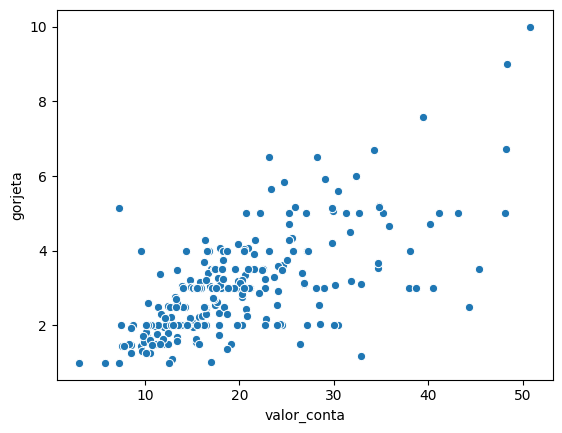

In [55]:
valor_gorjeta = sns.scatterplot(x='valor_conta', y='gorjeta', data=gorjetas)

**Obs: Visualmente, o valor da gorjeta aumenta conforma o valor da conta**

In [57]:
print(f'A base de dados contém {gorjetas.shape[0]} registros.\n')
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros.

Registros não nulos


valor_conta      244
gorjeta          244
sobremesa        244
dia_semana       244
hora             244
total_pessoas    244
dtype: int64

### Criando o Campo Porcentagem

In [59]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['valor_conta']).round(2)
gorjetas.head()

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


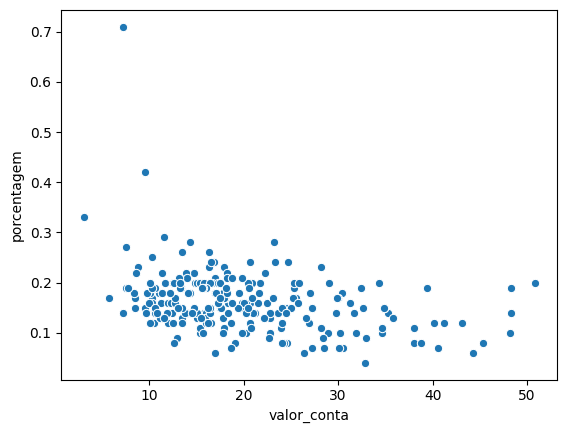

In [60]:
porcentagem_conta = sns.scatterplot(x='valor_conta', y='porcentagem', data=gorjetas)

**Obs: Visualmente, o valor da conta não é proporcional ao valor da gorjeta**

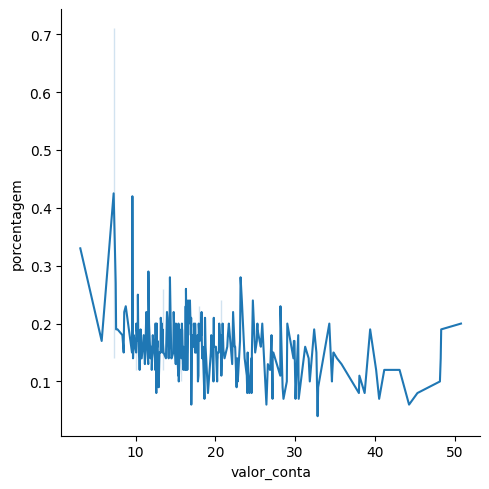

In [62]:
porcentagem_conta_linha = sns.relplot(x='valor_conta', y='porcentagem', kind='line', data=gorjetas)

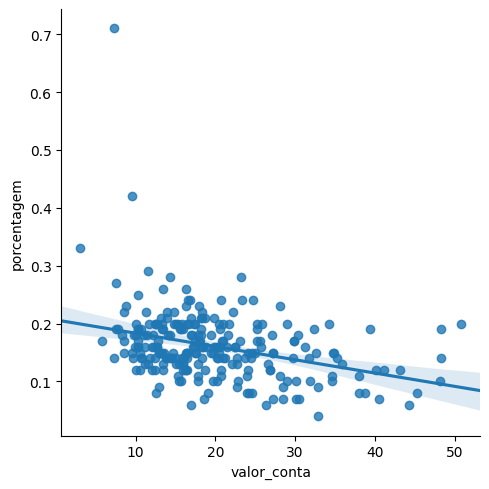

In [63]:
sns.lmplot(x='valor_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [64]:
gorjetas[gorjetas.sobremesa == 'Sim']

,valor_conta,gorjeta,sobremesa,dia_semana,hora,total_pessoas,porcentagem
56,38.01,3.00,Sim,Sábado,Jantar,4,0.08
58,11.24,1.76,Sim,Sábado,Jantar,2,0.16
60,20.29,3.21,Sim,Sábado,Jantar,2,0.16
61,13.81,2.00,Sim,Sábado,Jantar,2,0.14
62,11.02,1.98,Sim,Sábado,Jantar,2,0.18
...,...,...,...,...,...,...,...
234,15.53,3.00,Sim,Sábado,Jantar,2,0.19
236,12.60,1.00,Sim,Sábado,Jantar,2,0.08
237,32.83,1.17,Sim,Sábado,Jantar,2,0.04
240,27.18,2.00,Sim,Sábado,Jantar,2,0.07


In [65]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [66]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,valor_conta,gorjeta,total_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


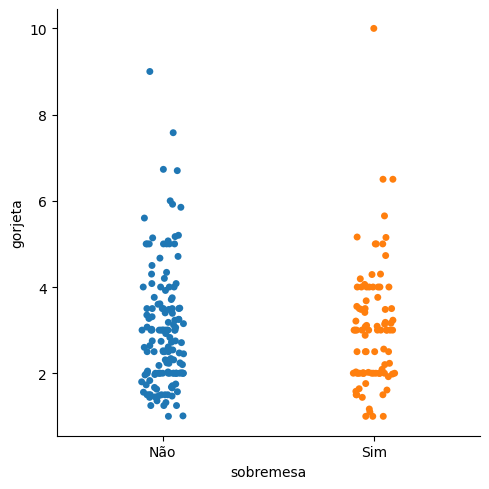

In [67]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

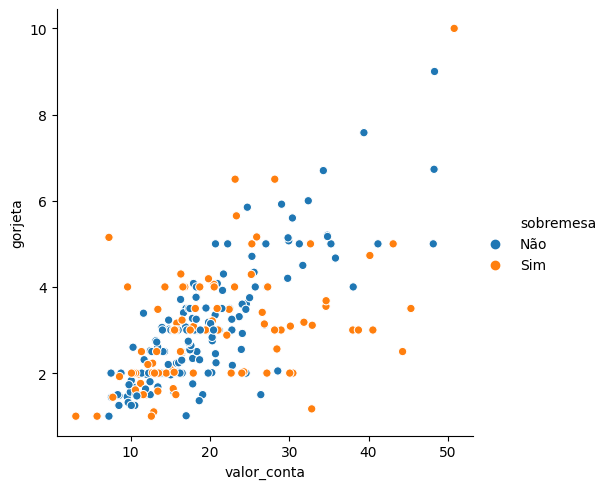

In [69]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', data=gorjetas)

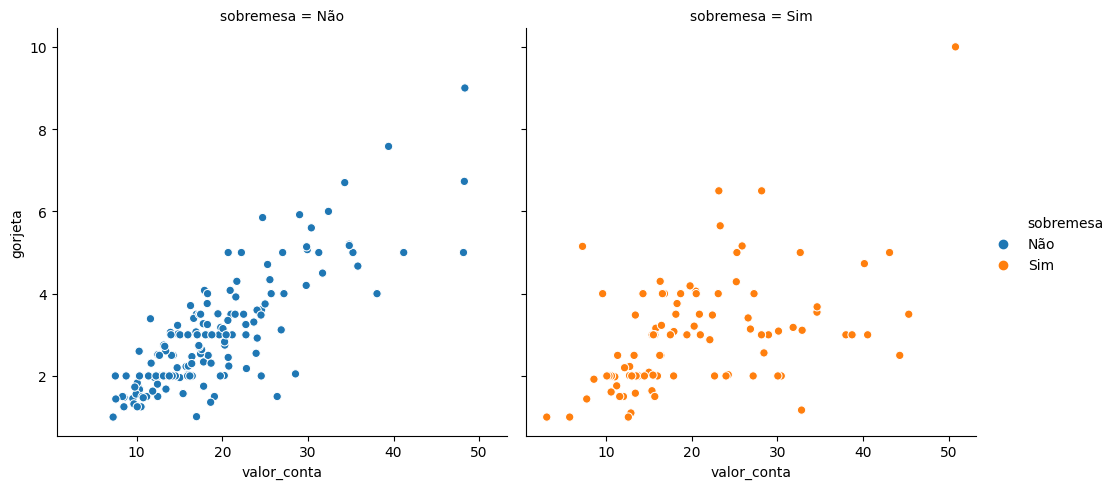

In [71]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

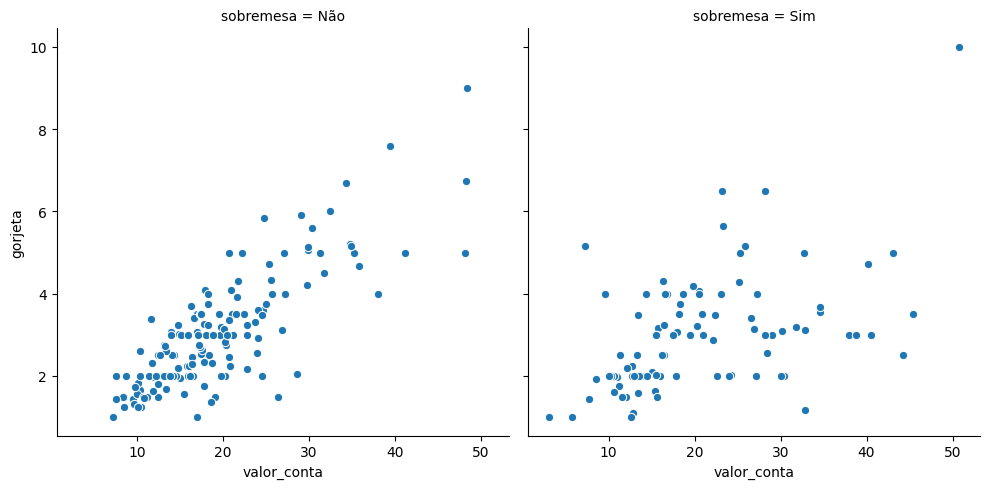

In [72]:
sns.relplot(x='valor_conta', y='gorjeta', col='sobremesa', data=gorjetas)

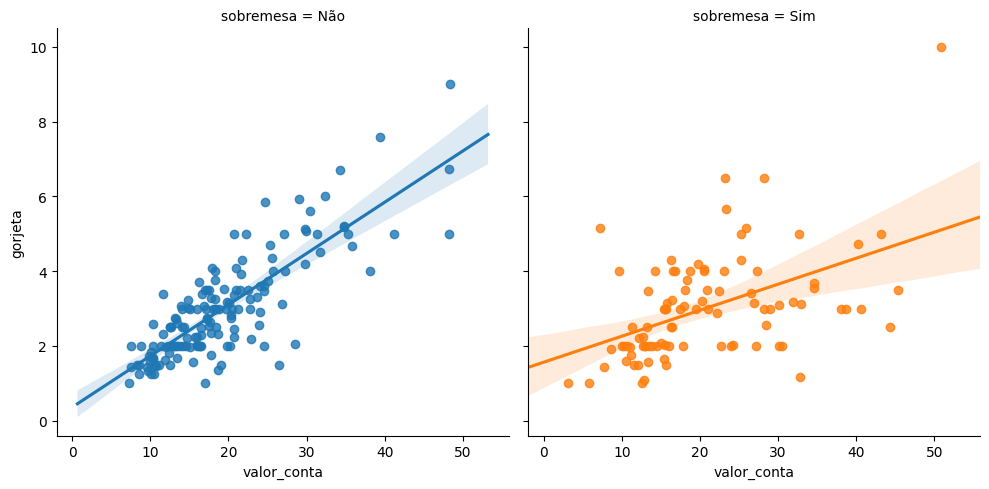

In [73]:
sns.lmplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

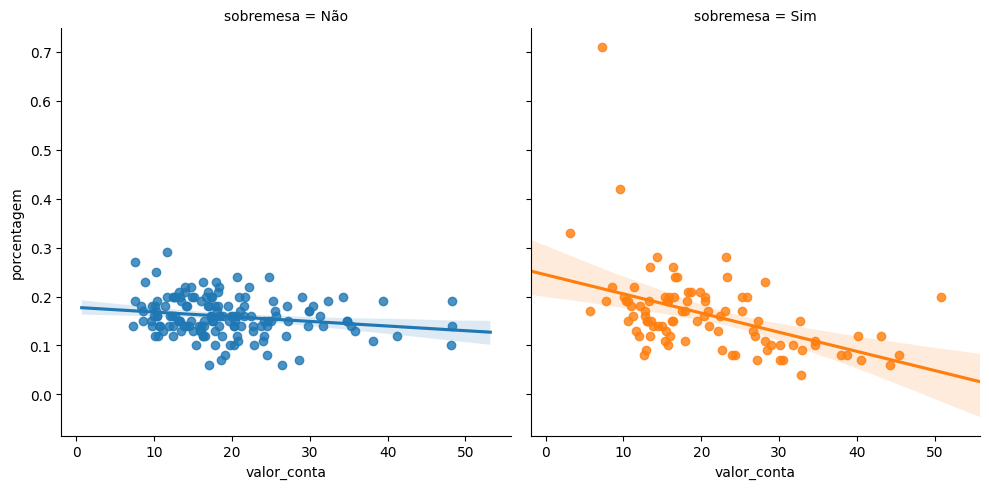

In [74]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

**Obs: Visualmente, existe uma diferença no valor da gorjeta daqueles que pediram sobremesa e os que não pediram**

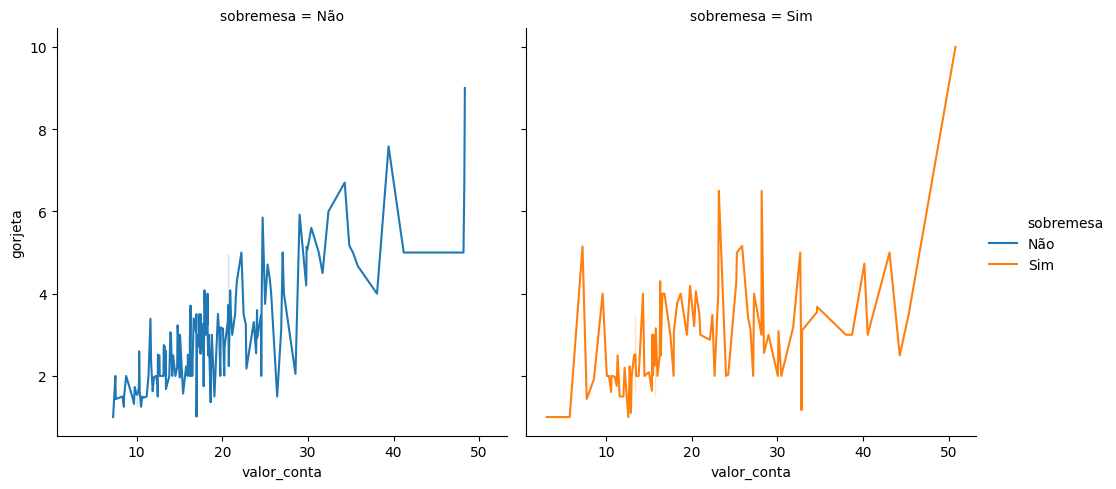

In [75]:
sns.relplot(x='valor_conta', y='gorjeta', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

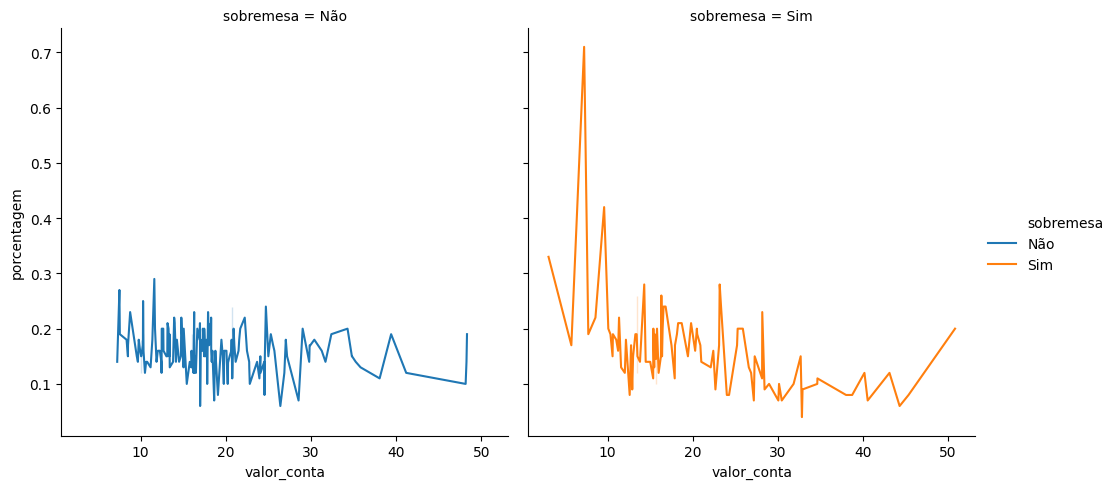

In [76]:
sns.relplot(x='valor_conta', y='porcentagem', hue='sobremesa', col='sobremesa', kind='line', data=gorjetas)

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [77]:
from scipy.stats import ranksums

In [80]:
com_sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [82]:
r = ranksums(com_sobremesa, sem_sobremesa)

In [83]:
print(f'O valor do p-value é {r.pvalue}')

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**Matematicamente a diferença é insignificante.**

O p-value representa a probabilidade daquela amostra ter acontecido dentro da população. Se a chance é pequena, geralmente p-value < 0,05, representa que um evento muito raro aconteceu, então optamos por descartar a hipótese nula, e dizer que ela pode não ser verdade.

# Análise 3 - Dias da Semana

In [85]:
gorjetas.dia_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

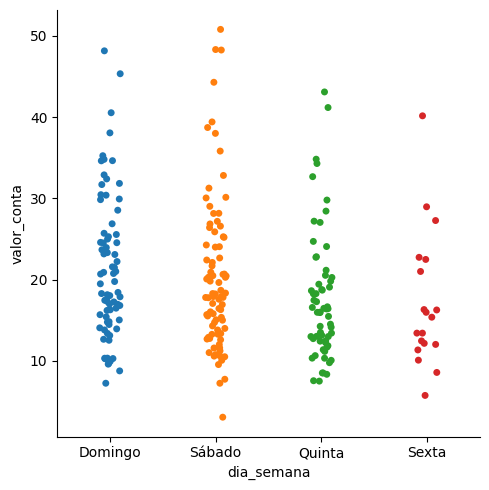

In [86]:
sns.catplot(x='dia_semana', y='valor_conta', data=gorjetas)

**Obs: Visualmente, as pessoas gastam mais aos finais de semana**

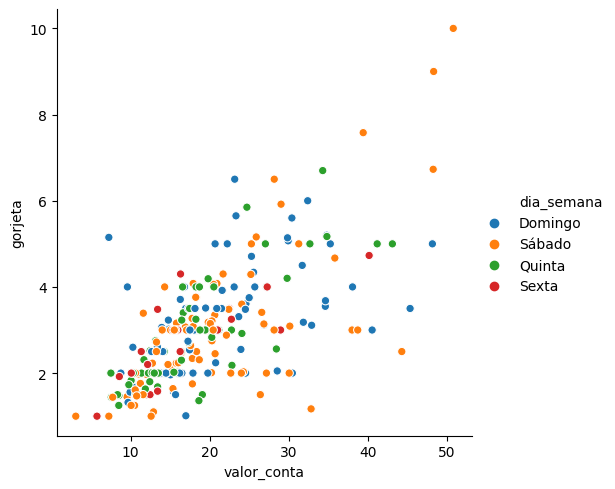

In [87]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia_semana', data=gorjetas)

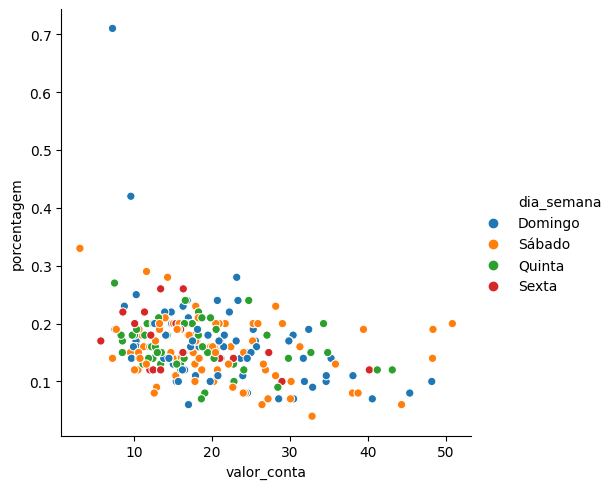

In [88]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia_semana', data=gorjetas)

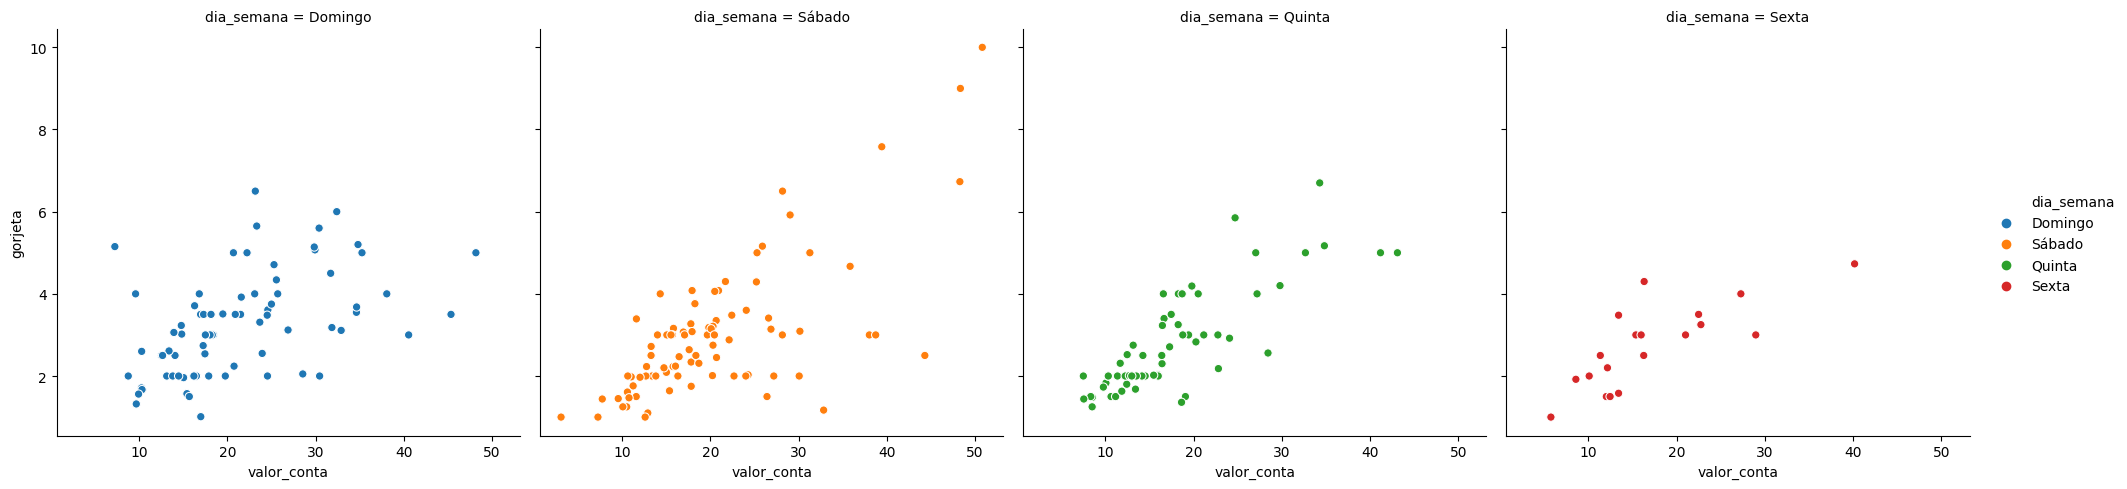

In [89]:
sns.relplot(x='valor_conta', y='gorjeta', hue='dia_semana', col='dia_semana', data=gorjetas)

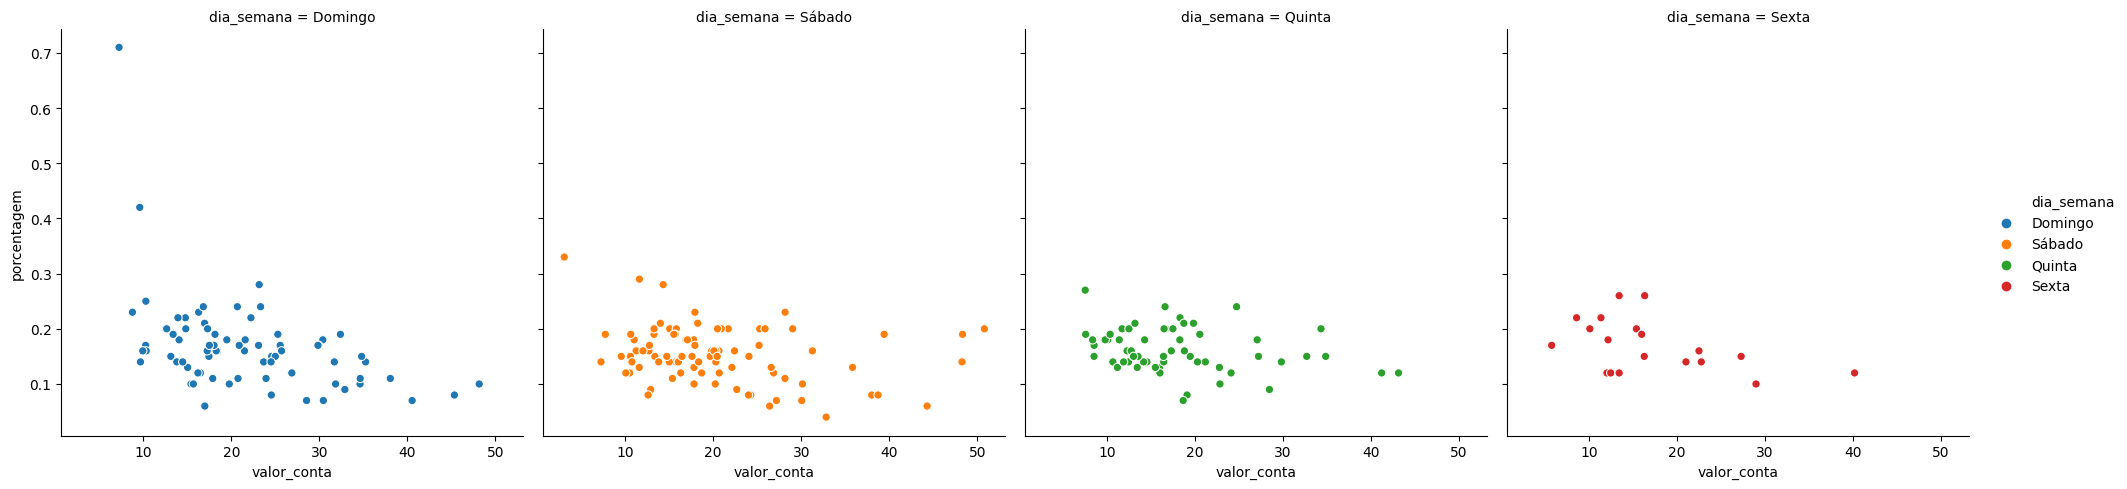

In [90]:
sns.relplot(x='valor_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=gorjetas)

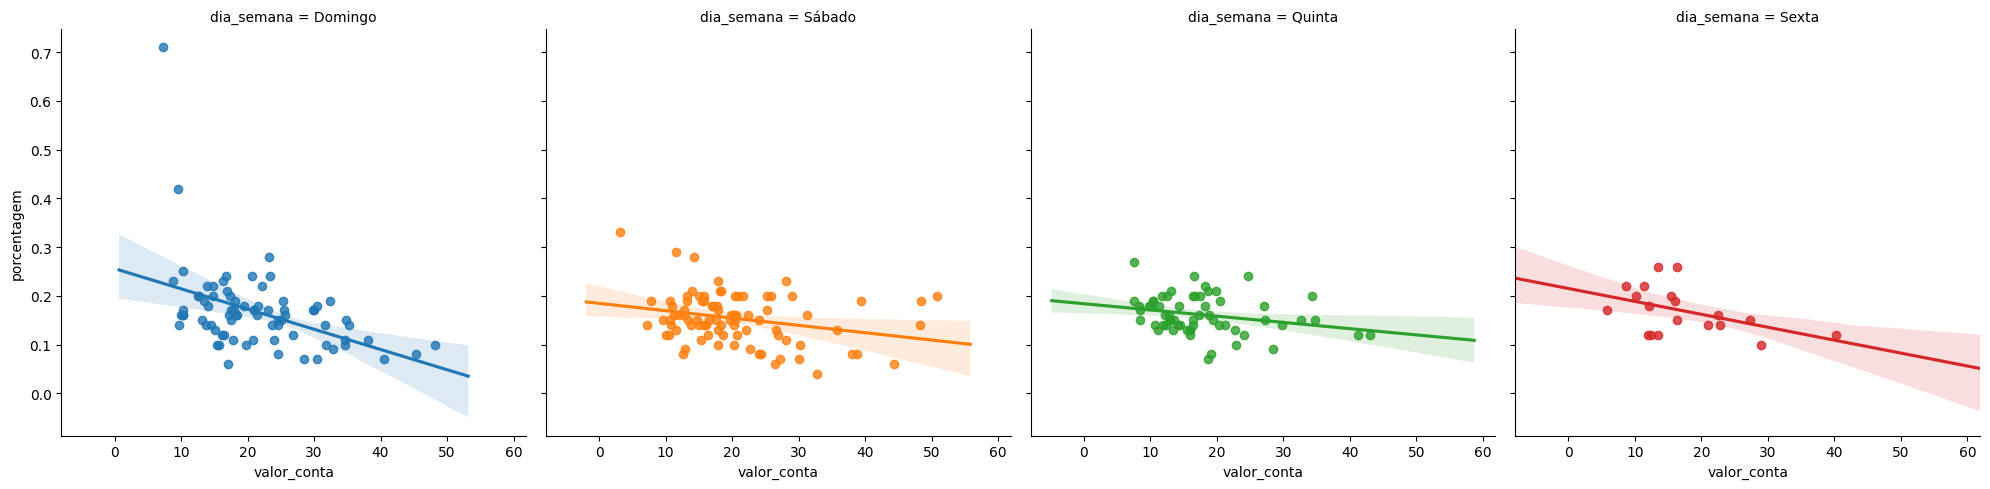

In [91]:
sns.lmplot(x='valor_conta', y='porcentagem', hue='dia_semana', col='dia_semana', data=gorjetas)

In [92]:
media_geral_gorjetas = gorjetas.gorjeta.mean()

In [93]:
print(f'A média geral das gorjetas é de {media_geral_gorjetas}')

A média geral das gorjetas é de 2.99827868852459


In [94]:
gorjetas.groupby(['dia_semana']).mean()

<ipython-input-94-4f3020b38ae5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_semana']).mean()


,valor_conta,gorjeta,total_pessoas,porcentagem
dia_semana,,,,
Domingo,21.410000,3.255132,2.842105,0.166974
Quinta,17.682742,2.771452,2.451613,0.161129
Sexta,17.151579,2.734737,2.105263,0.169474
Sábado,20.441379,2.993103,2.517241,0.153678


In [97]:
gorjetas.groupby(['dia_semana']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

<ipython-input-97-819ee05f423e>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['dia_semana']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]


,valor_conta,gorjeta,porcentagem
dia_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [99]:
print('Frequência dos dias')
gorjetas.dia_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_semana, dtype: int64

## Teste de Hipótese

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [100]:
valor_conta_domingo = gorjetas.query("dia_semana == 'Domingo'").valor_conta
valor_conta_sabado = gorjetas.query("dia_semana == 'Sábado'").valor_conta

In [104]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print(f'O valor do p-value é {r2.pvalue}')

O valor do p-value é 0.3576728477868443


**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Horário da Refeição

In [106]:
gorjetas.hora.unique()

array(['Jantar', 'Almoço'], dtype=object)

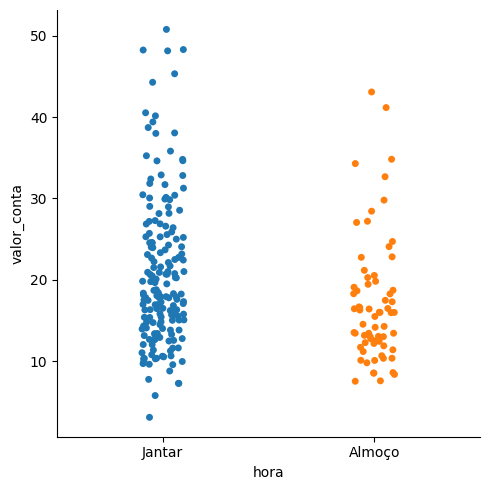

In [107]:
sns.catplot(x='hora', y='valor_conta', data=gorjetas)

**Obs: Visualmente, o valor da conta é maior no período do Jantar**

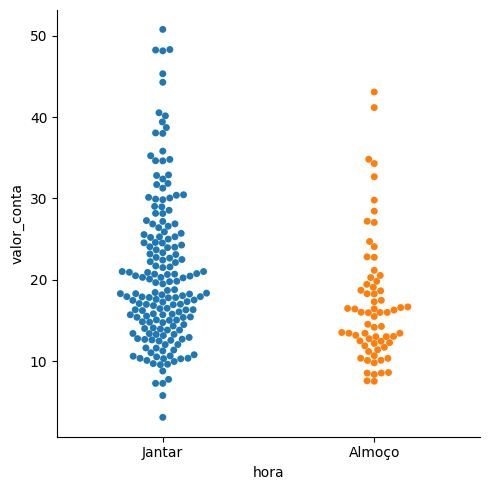

In [108]:
sns.catplot(x='hora', y='valor_conta', kind='swarm', data=gorjetas)

<Axes: xlabel='hora', ylabel='valor_conta'>

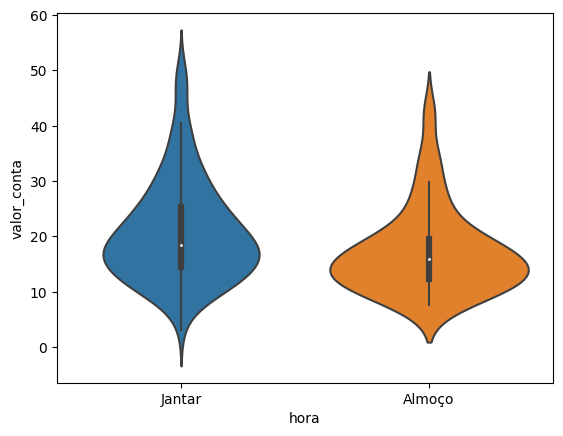

In [109]:
sns.violinplot(x='hora', y='valor_conta', data=gorjetas)

<Axes: xlabel='hora', ylabel='valor_conta'>

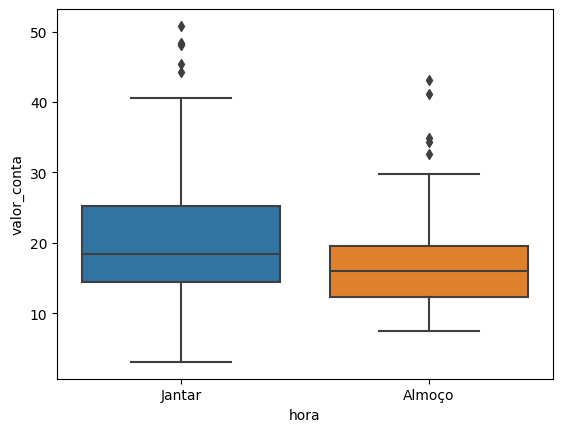

In [110]:
sns.boxplot(x='hora', y='valor_conta', data=gorjetas)

In [112]:
almoco = gorjetas.query("hora == 'Almoço'").valor_conta
jantar = gorjetas.query("hora == 'Jantar'").valor_conta

<Axes: xlabel='valor_conta'>

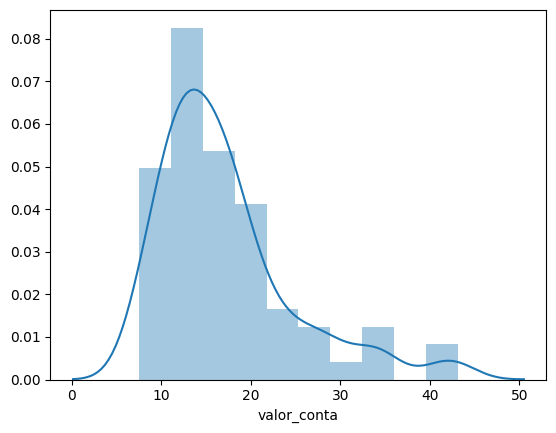

In [116]:
sns.distplot(almoco)

<Axes: xlabel='valor_conta'>

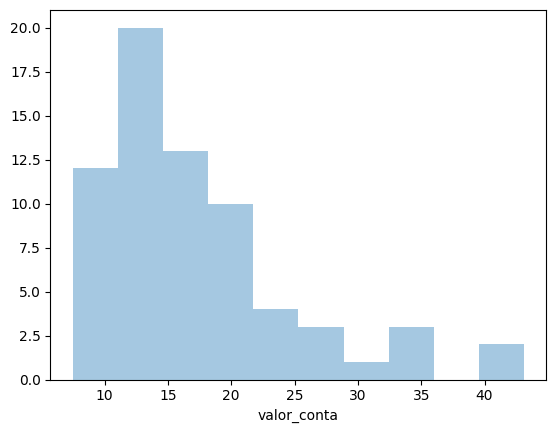

In [117]:
sns.distplot(almoco, kde=False)

<Axes: xlabel='valor_conta'>

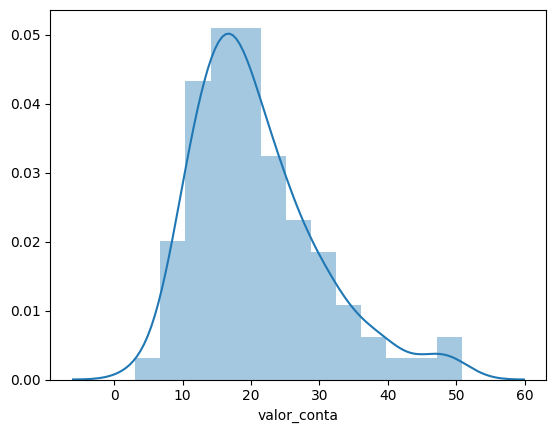

In [118]:
sns.distplot(jantar)

<Axes: xlabel='valor_conta'>

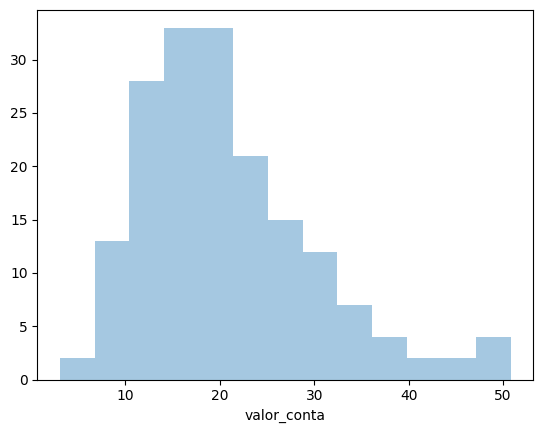

In [119]:
sns.distplot(jantar, kde=False)

<Axes: xlabel='valor_conta'>

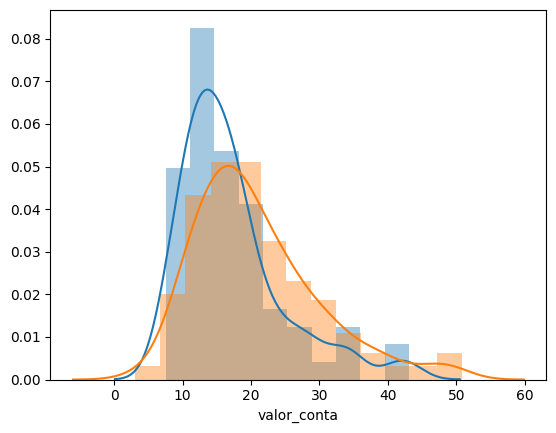

In [120]:
sns.distplot(almoco)
sns.distplot(jantar)

In [122]:
gorjetas.groupby(['hora']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]

<ipython-input-122-30ad2794adea>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gorjetas.groupby(['hora']).mean()[['valor_conta', 'gorjeta', 'porcentagem']]


,valor_conta,gorjeta,porcentagem
hora,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


## Teste de Hipótese 1

**H<sup>null</sup>**

>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [125]:
r3 = ranksums(jantar, almoco)
print(f'O valor do p-value é de {r3.pvalue}')

O valor do p-value é de 0.0011791039723641672


**H<sup>alt</sup>**

>**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de Hipótese 2

**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt</sup>**

>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [126]:
porcentagem_almoco = gorjetas.query("hora == 'Almoço'").porcentagem
porcentagem_jantar = gorjetas.query("hora == 'Jantar'").porcentagem

In [129]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)
print(f'O valor do p-value é de {r4.pvalue}')

O valor do p-value é de 0.2602493995587126


**H<sup>null</sup>**

>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**